In [ ]:
import torch
from torch.utils.data import DataLoader, Subset
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np
from torch import nn
import torch.optim as optim

# Transform pipeline without downsampling
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Load the MNIST dataset
full_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
full_testset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Filter for digits 2 and 3
def filter_23(dataset):
    indices = [i for i, (image, label) in enumerate(dataset) if label in [2, 3]]
    return Subset(dataset, indices)

trainset = filter_23(full_trainset)
testset = filter_23(full_testset)

# DataLoader
trainloader = DataLoader(trainset, batch_size=64, shuffle=True)
testloader = DataLoader(testset, batch_size=64, shuffle=False)

# Relabel for binary classification
for images, labels in trainloader:
    labels = torch.where(labels == 2, 0, 1)  # Relabel 2 as 0, 3 as 1
    print(images.shape)  # Should print torch.Size([batch_size, 1, 28, 28])
    break

# Define the model
class MNISTClassifier(nn.Module):
    def __init__(self):
        super(MNISTClassifier, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)  # Updated input size for 28x28 images
        self.silu = nn.SiLU()
        self.fc2 = nn.Linear(128, 1)  # Binary classification output
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = x.view(x.size(0), -1)  # Flatten the 28x28 images
        x = self.fc1(x)
        x = self.silu(x)
        x = self.fc2(x)
        x = self.sigmoid(x)
        return x

# Instantiate the model, loss function, and optimizer
model = MNISTClassifier()
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 16.0MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 480kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 4.38MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 4.65MB/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

torch.Size([64, 1, 28, 28])


In [ ]:


# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    for batch_data, batch_labels in trainloader:
        # Relabel 2 as 0 and 3 as 1
        batch_labels = torch.where(batch_labels == 2, 0, 1)

        # Reset gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(batch_data)
        loss = criterion(outputs.squeeze(), batch_labels.float())  # Ensure labels are float

        # Backward pass
        loss.backward()
        optimizer.step()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

print("Training finished.")


Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 17.9MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 496kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 4.51MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 4.97MB/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

torch.Size([64, 1, 28, 28])
Epoch [1/10], Loss: 0.0531
Epoch [2/10], Loss: 0.0248
Epoch [3/10], Loss: 0.0025
Epoch [4/10], Loss: 0.0237
Epoch [5/10], Loss: 0.0169
Epoch [6/10], Loss: 0.0134
Epoch [7/10], Loss: 0.0078
Epoch [8/10], Loss: 0.0109
Epoch [9/10], Loss: 0.0015
Epoch [10/10], Loss: 0.0022
Training finished.


In [ ]:
# save the model

torch.save(model.state_dict(), '/content/MNIST_non_downsample_model.pth')

In [ ]:
# Evaluation loop
correct_predictions = 0
total_samples = 0
with torch.no_grad():  # Disable gradient calculations during evaluation
    for batch_data, batch_labels in testloader:  # Use testloader for evaluation
        # Relabel 2 as 0 and 3 as 1
        batch_labels = torch.where(batch_labels == 2, 0, 1)

        # Forward pass
        outputs = model(batch_data)

        # Predicted labels: Apply threshold (outputs > 0.5 for class 1)
        predicted_labels = (outputs > 0.5).float()

        # Calculate correct predictions
        correct_predictions += (predicted_labels.squeeze() == batch_labels.float()).sum().item()
        total_samples += batch_labels.size(0)

# Calculate accuracy
accuracy = correct_predictions / total_samples
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 99.56%


In [ ]:


import torch

torch.save(model.state_dict(), '/content/MNIST_downsample_model.pth')


In [ ]:
!pip install livelossplot
!pip install imageio-ffmpeg

Sigmoid

In [ ]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def fn(out_pre,model_dict_ls,li):
    if li == len(model_dict_ls)/2:
        return out_pre
    out_cur = []
    for i in range(len(model_dict_ls[2*li])):
        x = 0
        for j in range(len(out_pre)):
            x = x + out_pre[j]*model_dict_ls[2*li][i][j]
        if li == (len(model_dict_ls)/2)-1:
            out_cur.append(x+model_dict_ls[2*li+1][i])
        else:
            out_cur.append(sigmoid(x+model_dict_ls[2*li+1][i]))
    li+=1
    return fn(np.array(out_cur),model_dict_ls,li)

SiLU

In [ ]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def fn(out_pre,model_dict_ls,li):
    if li == len(model_dict_ls)/2:
        return out_pre
    out_cur = []
    for i in range(len(model_dict_ls[2*li])):
        x = 0
        for j in range(len(out_pre)):
            x = x + out_pre[j]*model_dict_ls[2*li][i][j]
        out_cur.append((x+model_dict_ls[2*li+1][i])*sigmoid(x+model_dict_ls[2*li+1][i]))
    li+=1
    return fn(np.array(out_cur),model_dict_ls,li)

SiLU + Final layer Sigmoid

In [ ]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def fn(out_pre,model_dict_ls,li):
    if li == len(model_dict_ls)/2:
        return out_pre
    out_cur = []
    for i in range(len(model_dict_ls[2*li])):
        x = 0
        for j in range(len(out_pre)):
            x = x + out_pre[j]*model_dict_ls[2*li][i][j]
        if li == (len(model_dict_ls)/2)-1:
            out_cur.append(sigmoid(x+model_dict_ls[2*li+1][i]))
        else:
            out_cur.append((x+model_dict_ls[2*li+1][i])*sigmoid(x+model_dict_ls[2*li+1][i]))
    li+=1
    return fn(np.array(out_cur),model_dict_ls,li)

Helpers

In [ ]:

def get_square_slice_from_one_anchor(anchors,pad_dist=1,seed=None):
    """
    Given one vector as an anchor, takes a randomly oriented slice with the anchor at the center
    """
#     if seed is not None:
#         torch.manual_seed(seed)

    assert len(anchors) == 1

    centroid = anchors[0]

    z1 = torch.randn_like(anchors[0])
    z2 = torch.randn_like(anchors[0])

    u1 = z1
    u2 = z2 - (u1.T @ z2)/(u1.T @ u1)*u1

    dirs = torch.vstack([u1,u2])
    dirs /= torch.linalg.norm(dirs,dim=-1,keepdim=True)
    domain = torch.vstack([centroid+pad_dist*dirs,centroid-pad_dist*dirs])
    domain_poly = torch.vstack([domain,domain[:1]])

    return domain_poly



def get_square_slice_from_two_anchors(anchors,pad_dist=1,seed=-1):

    if not seed == -1: #None buggy for jit
        torch.manual_seed(seed)

    assert len(anchors) == 2

    centroid = torch.mean(anchors,dim=0)

    u1 = anchors[0] - centroid
    z = torch.randn_like(anchors[0])
    u2 = z - (u1.T @ z)/(u1.T @ u1)*u1

    dirs = torch.vstack([u1,u2])
    dirs /= torch.linalg.norm(dirs,dim=-1,keepdim=True)
    domain = torch.vstack([centroid+pad_dist*dirs,centroid-pad_dist*dirs])
    domain_poly = torch.vstack([domain,domain[:1]])

    return domain_poly

def get_square_domain_from_three_anchors(anchors,pad_dist=1,seed=-1):

    if not seed == -1: #None buggy for jit
        torch.manual_seed(seed)

    assert len(anchors) == 3

    centroid = torch.mean(anchors,dim=0)

    u1 = anchors[0] - centroid
    z = torch.randn_like(anchors[0])
    u2 = z - (u1.T @ z)/(u1.T @ u1)*u1

    dirs = torch.vstack([u1,u2])
    dirs /= torch.linalg.norm(dirs,dim=-1,keepdim=True)
    domain = torch.vstack([centroid+pad_dist*dirs,centroid-pad_dist*dirs])
    domain_poly = torch.vstack([domain,domain[:1]])

    return domain_poly

def get_square_bad_domain_from_three_anchors(anchors, pad_dist=1):
    """
    Generate a square domain in n-dimensional space based on three anchor points.
    The square lies in the plane defined by the three anchors, centered at their centroid,
    and with side length equal to pad_dist.
    """
    assert len(anchors) == 3, "Exactly three anchors are required."
    anchors = anchors#torch.stack(anchors)
    centroid = torch.mean(anchors, dim=0)

    # Compute vectors in the plane
    v1 = anchors[1] - anchors[0]
    v2 = anchors[2] - anchors[0]

    # Orthonormal basis via Gram-Schmidt process
    u1 = v1 / torch.norm(v1)
    v2_proj = v2 - torch.dot(v2, u1) * u1
    u2 = v2_proj / torch.norm(v2_proj)

    # Now u1 and u2 are orthonormal vectors in the plane

    # Define the square in the plane, centered at the centroid
    s = pad_dist / 2  # Half the side length

    # Define the four corners of the square
    corners = []
    for dx, dy in [(-s, -s), (-s, s), (s, s), (s, -s)]:
        point = centroid + dx * u1 + dy * u2
        corners.append(point)

    # Close the polygon
    domain_poly = torch.stack(corners + [corners[0]])

    return domain_poly


def get_proj_mat(domain):

    v1 = domain[1] - domain[0]
    v2 = domain[-2] - domain[0]

    v = torch.vstack([v1,v2])
    v /= torch.linalg.norm(v,dim=-1,keepdim=True)

    return torch.hstack([v.T,domain.mean(0,keepdim=True).T])

In [ ]:
samples = []
label_done = -1
for i, (data, labels) in enumerate(trainloader):
    if label_done != labels[0]:
        samples.append(data[0].flatten())  # Get the first data point from the batch
        label_done = labels[0]
        print(labels[0])
    if len(samples) == 2:
        break

stacked_samples = torch.stack(samples)
stacked_samples

tensor(3)
tensor(2)


tensor([[-1., -1., -1.,  ..., -1., -1., -1.],
        [-1., -1., -1.,  ..., -1., -1., -1.]])

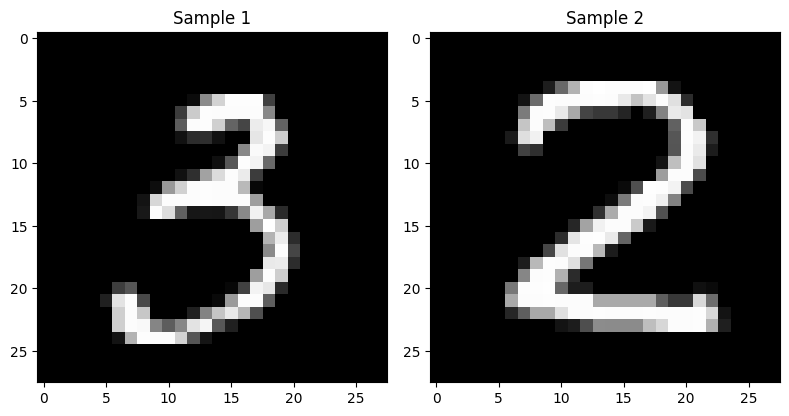

In [ ]:
import matplotlib.pyplot as plt

# Reshape the flattened tensors back into 28x28 images
image1 = stacked_samples[0].reshape(28, 28)
image2 = stacked_samples[1].reshape(28, 28)

# Create a figure and axes
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# Display the first image
axes[0].imshow(image1, cmap='gray')
axes[0].set_title('Sample 1')

# Display the second image
axes[1].imshow(image2, cmap='gray')
axes[1].set_title('Sample 2')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [ ]:
stacked_samples.shape

torch.Size([2, 784])

In [ ]:
other_samples = []
label_done = -1
for i, (data, labels) in enumerate(trainloader):
    if label_done != labels[0]:
        other_samples.append(data[0].flatten())  # Get the first data point from the batch
        label_done = labels[0]
        print(labels[0])
    if len(other_samples) == 2:
        break

stacked_other_samples = torch.stack(other_samples)
stacked_other_samples

tensor(3)
tensor(2)


tensor([[-1., -1., -1.,  ..., -1., -1., -1.],
        [-1., -1., -1.,  ..., -1., -1., -1.]])

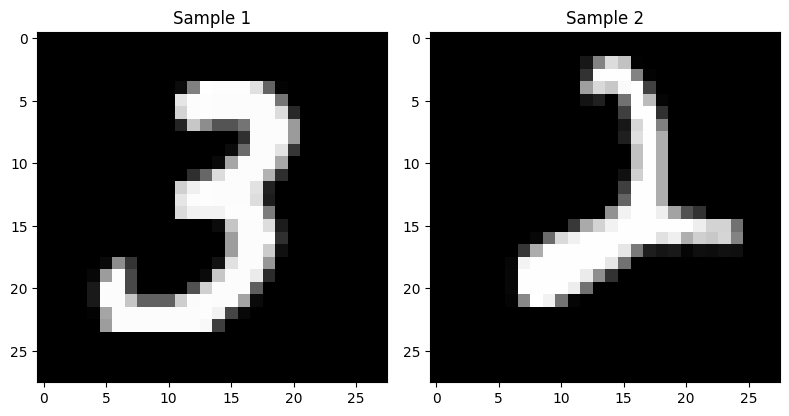

In [ ]:
import matplotlib.pyplot as plt

# Reshape the flattened tensors back into 28x28 images
image1 = stacked_other_samples[0].reshape(28, 28)
image2 = stacked_other_samples[1].reshape(28, 28)

# Create a figure and axes
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# Display the first image
axes[0].imshow(image1, cmap='gray')
axes[0].set_title('Sample 1')

# Display the second image
axes[1].imshow(image2, cmap='gray')
axes[1].set_title('Sample 2')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [ ]:
# Calculate Euclidean distance
def euclidean_distance(vector1, vector2):
    return torch.norm(vector1 - vector2)

# Assuming stacked_samples is already defined from the previous code
distance = euclidean_distance(stacked_other_samples[0], stacked_samples[0])

print(f"Euclidean distance between the two vectors: {distance}")

Euclidean distance between the two vectors: 15.785181045532227


In [ ]:
# Calculate Euclidean distance
def euclidean_distance(vector1, vector2):
    return torch.norm(vector1 - vector2)

# Assuming stacked_samples is already defined from the previous code
distance = euclidean_distance(stacked_other_samples[1], stacked_samples[1])

print(f"Euclidean distance between the two vectors: {distance}")

Euclidean distance between the two vectors: 19.697071075439453


In [ ]:
# Calculate Euclidean distance
def euclidean_distance(vector1, vector2):
    return torch.norm(vector1 - vector2)

# Assuming stacked_samples is already defined from the previous code
distance = euclidean_distance(stacked_other_samples[0], stacked_other_samples[1])

print(f"Euclidean distance between the two vectors: {distance}")

Euclidean distance between the two vectors: 21.409828186035156


In [ ]:
# Calculate Euclidean distance
def euclidean_distance(vector1, vector2):
    return torch.norm(vector1 - vector2)

# Assuming stacked_samples is already defined from the previous code
distance = euclidean_distance(stacked_samples[0], stacked_samples[1])

print(f"Euclidean distance between the two vectors: {distance}")

Euclidean distance between the two vectors: 22.521848678588867


In [ ]:
import numpy as np
from matplotlib.path import Path

def get_proj_mat(domain):
    """
    Compute the projection matrix P and translation vector x0 for projecting n-dimensional points to 2D.
    """
    v1 = domain[1] - domain[0]
    v2 = domain[2] - domain[0]

    # Orthonormal basis via Gram-Schmidt process
    e1 = v1 / np.linalg.norm(v1)
    v2_proj = v2 - np.dot(v2, e1) * e1
    e2 = v2_proj / np.linalg.norm(v2_proj)

    # Projection matrix from nD to 2D
    P = np.vstack([e1, e2])  # Shape: (2, n)

    # Translation vector (mean of the domain)
    x0 = domain.mean(axis=0)  # Shape: (n,)

    return P, x0

def project_points(points, P, x0):
    """
    Project n-dimensional points to 2D using projection matrix P and translation x0.
    """
    return (P @ (points - x0).T).T  # Shape: (N, 2)

def back_project_points(points_2d, P, x0):
    """
    Back-project 2D points to n-dimensional space using the pseudoinverse of P and translation x0.
    """
    P_pinv = np.linalg.pinv(P)  # Shape: (n, 2)
    return (P_pinv @ points_2d.T).T + x0  # Shape: (N, n)

def create_2d_arrays_for_hyperspace(domain):
    """
    Create 2D arrays for each dimension such that the square domain in hyperspace is represented
    as a 2D grid of points lying within the domain.
    """
    # Step 1: Compute the projection matrix and translation vector
    P, x0 = get_proj_mat(domain)  # P: (2, n), x0: (n,)

    # Step 2: Project the domain to 2D
    domain_2d = project_points(domain, P, x0)  # Shape: (m, 2)

    # Step 3: Create a 2D grid in the projected space
    x_min, x_max = domain_2d[:, 0].min(), domain_2d[:, 0].max()
    y_min, y_max = domain_2d[:, 1].min(), domain_2d[:, 1].max()
    x2 = np.linspace(x_min, x_max, 100)
    y2 = np.linspace(y_min, y_max, 100)
    X2, Y2 = np.meshgrid(x2, y2)  # Shapes: (100, 100)

    # Step 4: Flatten the grid and back-project to hyperspace
    grid_2d_flat = np.vstack([X2.ravel(), Y2.ravel()]).T  # Shape: (10000, 2)
    back_projected_points_flat = back_project_points(grid_2d_flat, P, x0)  # Shape: (10000, n)

    # Step 5: Filter points that lie inside the projected domain
    path = Path(domain_2d)
    inside_mask_flat = path.contains_points(grid_2d_flat)  # Shape: (10000,)

    # Step 6: Reshape back-projected points and mask to grid shape
    back_projected_points = back_projected_points_flat.reshape(X2.shape + (back_projected_points_flat.shape[1],))  # Shape: (100, 100, n)

    # Assuming grid_points is the array of shape (100, 100, n)
    unstacked_matrices = np.moveaxis(back_projected_points, -1, 0)  # Move the last axis to the first

    # Now unstacked_matrices is of shape (n, 100, 100)
    # You can unpack it into individual matrices
    dimension_matrices = list(unstacked_matrices)

    # Step 7: Set points outside the domain to NaN
    # inside_mask = inside_mask_flat.reshape(X2.shape)  # Shape: (100, 100)
    # back_projected_points[~inside_mask] = np.nan

    # The result is a 3D array where each layer along the last axis represents one dimension in hyperspace
    return dimension_matrices

# Calculate Euclidean distance
def euclidean_distance(vector1, vector2):
    return torch.norm(vector1 - vector2)

# Assuming stacked_samples is already defined from the previous code
distance = euclidean_distance(stacked_samples[0], stacked_samples[1])

print(f"Euclidean distance between the two vectors: {distance}")


# Example usage
domain = get_square_slice_from_two_anchors(stacked_samples,pad_dist=int(distance/2),seed=42).detach().numpy()
# domain = np.array([
#     [0.2572, 0.7355, 1.1020],
#     [1.5166, -1.7285, 0.5166],
#     [-0.7304, -2.5139, -1.0113],
#     [-1.9897, -0.0499, -0.4259],
#     [0.2572, 0.7355, 1.1020]  # Closing the polygon
# ])

grid_points = create_2d_arrays_for_hyperspace(domain)

print("Shape of the final 2D stacked array:", len(grid_points))


Euclidean distance between the two vectors: 22.521848678588867
Shape of the final 2D stacked array: 784


For an extra 3

In [ ]:
import torch

def get_square_domain_from_three_anchors(anchors, pad_dist=1, seed=-1):
    if seed != -1:
        torch.manual_seed(seed)

    assert len(anchors) == 3

    # Compute the centroid of the anchors
    centroid = torch.mean(anchors, dim=0)

    # Vectors in the plane defined by the anchors
    u1 = anchors[1] - anchors[0]
    u2 = anchors[2] - anchors[0]

    # Orthonormalize u1 and u2 using the Gram-Schmidt process
    u1 = u1 / torch.linalg.norm(u1)
    u2 = u2 - torch.dot(u2, u1) * u1
    u2_norm = torch.linalg.norm(u2)
    if u2_norm < 1e-8:
        # If u2 is nearly zero vector after orthogonalization, generate a random vector orthogonal to u1
        u2 = torch.randn_like(u1)
        u2 = u2 - torch.dot(u2, u1) * u1
        u2_norm = torch.linalg.norm(u2)
    u2 = u2 / u2_norm

    # Directions (orthonormal basis) in the plane
    dirs = torch.stack([u1, u2])

    # Project the anchors onto the plane's coordinate system
    projections = (anchors - centroid) @ dirs.T  # Shape: (3, 2)

    # Find min and max projections along each direction
    min_proj = projections.min(dim=0).values - pad_dist
    max_proj = projections.max(dim=0).values + pad_dist

    # Adjust the ranges to make the domain a square
    ranges = max_proj - min_proj
    max_range = torch.max(ranges)
    for i in range(2):
        if ranges[i] < max_range:
            delta = max_range - ranges[i]
            min_proj[i] -= delta / 2
            max_proj[i] += delta / 2

    # Construct the square domain corners in the projection plane
    corners_proj = torch.tensor([
        [min_proj[0], min_proj[1]],
        [min_proj[0], max_proj[1]],
        [max_proj[0], max_proj[1]],
        [max_proj[0], min_proj[1]]
    ])

    # Map the corners back to the original hyperdimensional space
    corners = centroid + corners_proj @ dirs

    # Close the polygon by appending the first corner at the end
    domain_poly = torch.vstack([corners, corners[0].unsqueeze(0)])

    return domain_poly


In [ ]:
samples2 = samples.copy()
samples2.append(stacked_other_samples[0])
stacked_three_samples = torch.stack(samples2)

In [ ]:
stacked_three_samples

tensor([[-1., -1., -1.,  ..., -1., -1., -1.],
        [-1., -1., -1.,  ..., -1., -1., -1.],
        [-1., -1., -1.,  ..., -1., -1., -1.]])

In [ ]:
domain

array([[-1.        , -1.        , -1.        , ..., -1.        ,
        -1.        , -1.        ],
       [-0.241727  , -0.41472918, -0.6455529 , ..., -0.69728035,
        -1.3017849 , -1.3736386 ],
       [-1.        , -1.        , -1.        , ..., -1.        ,
        -1.        , -1.        ],
       [-1.758273  , -1.5852709 , -1.3544471 , ..., -1.3027196 ,
        -0.6982151 , -0.6263613 ],
       [-1.        , -1.        , -1.        , ..., -1.        ,
        -1.        , -1.        ]], dtype=float32)

In [ ]:
distance

tensor(22.5218)

In [ ]:
# Assuming stacked_samples is already defined from the previous code
distance = euclidean_distance(stacked_samples[0], stacked_samples[1])
domain = get_square_domain_from_three_anchors(stacked_three_samples,pad_dist=int(distance*2/3),seed=42).detach().numpy()

grid_points = create_2d_arrays_for_hyperspace(domain)

print("Shape of the final 2D stacked array:", len(grid_points))

Shape of the final 2D stacked array: 784


In [ ]:
model_dict_ls = [np.array(ls.cpu()) for ls in list(model.state_dict().values())]
Z = fn(np.array(grid_points),model_dict_ls,0)[0]

In [ ]:
len(Z[Z>0.9])

9542

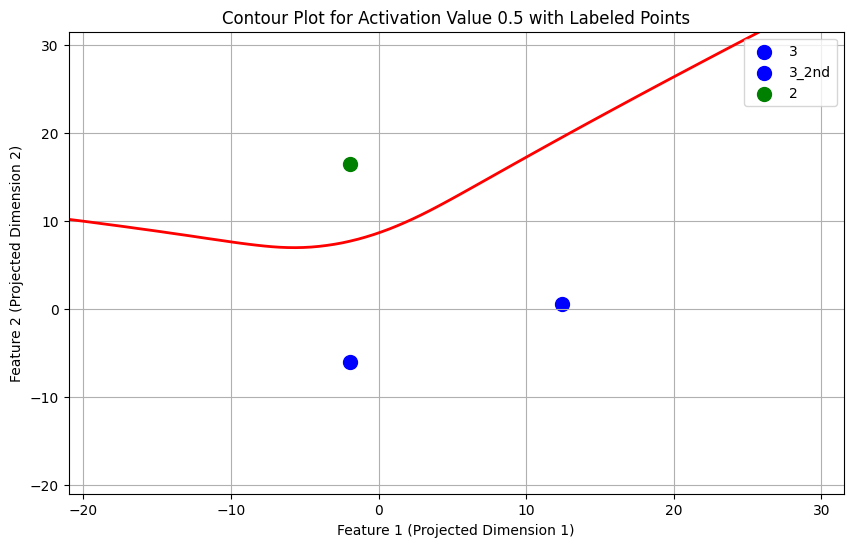

In [ ]:
# Step 1: Compute the projection matrix and translation vector
P, x0 = get_proj_mat(domain)  # P: (2, n), x0: (n,)

# Step 2: Project the domain to 2D
domain_2d = project_points(domain, P, x0)  # Shape: (m, 2)

# Step 3: Create a 2D grid in the projected space
x_min, x_max = domain_2d[:, 0].min(), domain_2d[:, 0].max()
y_min, y_max = domain_2d[:, 1].min(), domain_2d[:, 1].max()
x2 = np.linspace(x_min, x_max, 100)
y2 = np.linspace(y_min, y_max, 100)
X2, Y2 = np.meshgrid(x2, y2)  # Shapes: (100, 100)



# Define the labeled points
labeled_points = {
    "3": np.array(stacked_three_samples[0].detach().numpy()),
    "3_2nd": np.array(stacked_three_samples[2].detach().numpy()),
    "2": np.array(stacked_three_samples[1].detach().numpy()),
}

# Project the labeled points to 2D
projected_labeled_points = {label: project_points(point[None, :], P, x0)[0] for label, point in labeled_points.items()}

# Plot the contour for activation value 0.5
plt.figure(figsize=(10, 6))
contour = plt.contour(X2, Y2, Z, levels=[0.5], colors='red', linewidths=2)

# Plot the labeled points
for label, point in projected_labeled_points.items():
    if label in ["3" ,"3_2nd"]:
        plt.scatter(point[0], point[1], color='blue', label=label, s=100)  # Blue for inside
    elif label == "2":
        plt.scatter(point[0], point[1], color='green', label=label, s=100)  # Green for outside

# Add labels, title, and legend
plt.xlabel('Feature 1 (Projected Dimension 1)')
plt.ylabel('Feature 2 (Projected Dimension 2)')
plt.title('Contour Plot for Activation Value 0.5 with Labeled Points')
plt.legend()
plt.grid()
plt.show()


In [ ]:
model(stacked_three_samples[0].unsqueeze(0))

tensor([[1.0000]], grad_fn=<SigmoidBackward0>)

In [ ]:
model(stacked_three_samples[2].unsqueeze(0))

tensor([[1.0000]], grad_fn=<SigmoidBackward0>)

In [ ]:
model(stacked_three_samples[1].unsqueeze(0))

tensor([[0.0004]], grad_fn=<SigmoidBackward0>)

In [ ]:
samples.pop()
samples.append(stacked_samples[0])
stacked_three_samples2 = torch.stack(samples)

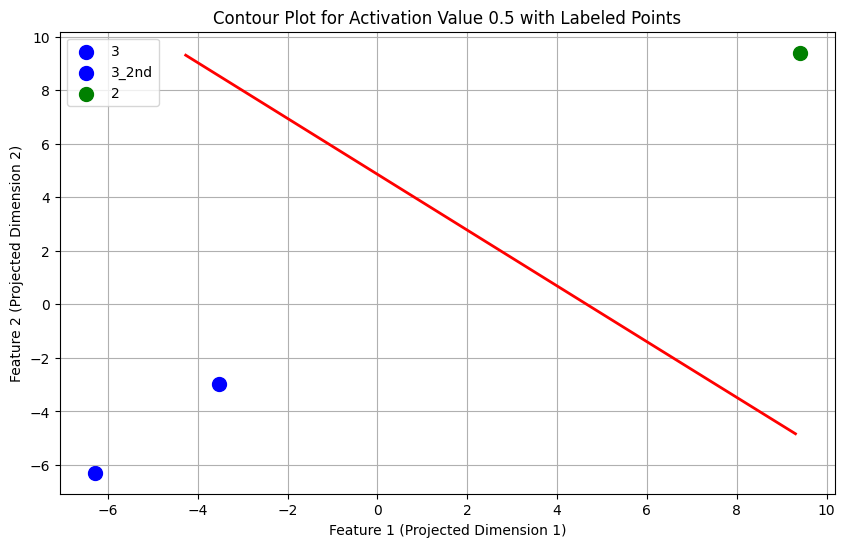

In [ ]:
# Step 1: Compute the projection matrix and translation vector
P, x0 = get_proj_mat(domain)  # P: (2, n), x0: (n,)

# Step 2: Project the domain to 2D
domain_2d = project_points(domain, P, x0)  # Shape: (m, 2)

# Step 3: Create a 2D grid in the projected space
x_min, x_max = domain_2d[:, 0].min(), domain_2d[:, 0].max()
y_min, y_max = domain_2d[:, 1].min(), domain_2d[:, 1].max()
x2 = np.linspace(x_min, x_max, 100)
y2 = np.linspace(y_min, y_max, 100)
X2, Y2 = np.meshgrid(x2, y2)  # Shapes: (100, 100)



# Define the labeled points
labeled_points = {
    "3": np.array(stacked_samples[0].detach().numpy()),
    "3_2nd": np.array(stacked_other_samples[0].detach().numpy()),
    "2": np.array(stacked_samples[1].detach().numpy()),
}

# Project the labeled points to 2D
projected_labeled_points = {label: project_points(point[None, :], P, x0)[0] for label, point in labeled_points.items()}

# Plot the contour for activation value 0.5
plt.figure(figsize=(10, 6))
contour = plt.contour(X2, Y2, Z, levels=[0.5], colors='red', linewidths=2)

# Plot the labeled points
for label, point in projected_labeled_points.items():
    if label in ["3" ,"3_2nd"]:
        plt.scatter(point[0], point[1], color='blue', label=label, s=100)  # Blue for inside
    elif label == "2":
        plt.scatter(point[0], point[1], color='green', label=label, s=100)  # Green for outside

# Add labels, title, and legend
plt.xlabel('Feature 1 (Projected Dimension 1)')
plt.ylabel('Feature 2 (Projected Dimension 2)')
plt.title('Contour Plot for Activation Value 0.5 with Labeled Points')
plt.legend()
plt.grid()
plt.show()


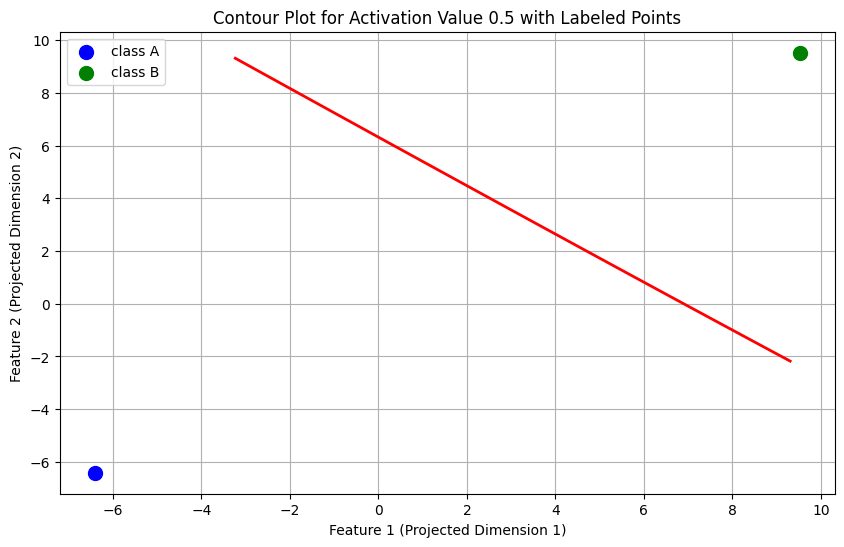

In [ ]:
# Step 1: Compute the projection matrix and translation vector
P, x0 = get_proj_mat(domain)  # P: (2, n), x0: (n,)

# Step 2: Project the domain to 2D
domain_2d = project_points(domain, P, x0)  # Shape: (m, 2)

# Step 3: Create a 2D grid in the projected space
x_min, x_max = domain_2d[:, 0].min(), domain_2d[:, 0].max()
y_min, y_max = domain_2d[:, 1].min(), domain_2d[:, 1].max()
x2 = np.linspace(x_min, x_max, 100)
y2 = np.linspace(y_min, y_max, 100)
X2, Y2 = np.meshgrid(x2, y2)  # Shapes: (100, 100)



# Define the labeled points
labeled_points = {
    "class A": np.array(stacked_samples[0].detach().numpy()),
    "class B": np.array(stacked_samples[1].detach().numpy()),
}

# Project the labeled points to 2D
projected_labeled_points = {label: project_points(point[None, :], P, x0)[0] for label, point in labeled_points.items()}

# Plot the contour for activation value 0.5
plt.figure(figsize=(10, 6))
contour = plt.contour(X2, Y2, Z, levels=[0.5], colors='red', linewidths=2)

# Plot the labeled points
for label, point in projected_labeled_points.items():
    if label == "class A":
        plt.scatter(point[0], point[1], color='blue', label=label, s=100)  # Blue for inside
    elif label == "class B":
        plt.scatter(point[0], point[1], color='green', label=label, s=100)  # Green for outside

# Add labels, title, and legend
plt.xlabel('Feature 1 (Projected Dimension 1)')
plt.ylabel('Feature 2 (Projected Dimension 2)')
plt.title('Contour Plot for Activation Value 0.5 with Labeled Points')
plt.legend()
plt.grid()
plt.show()


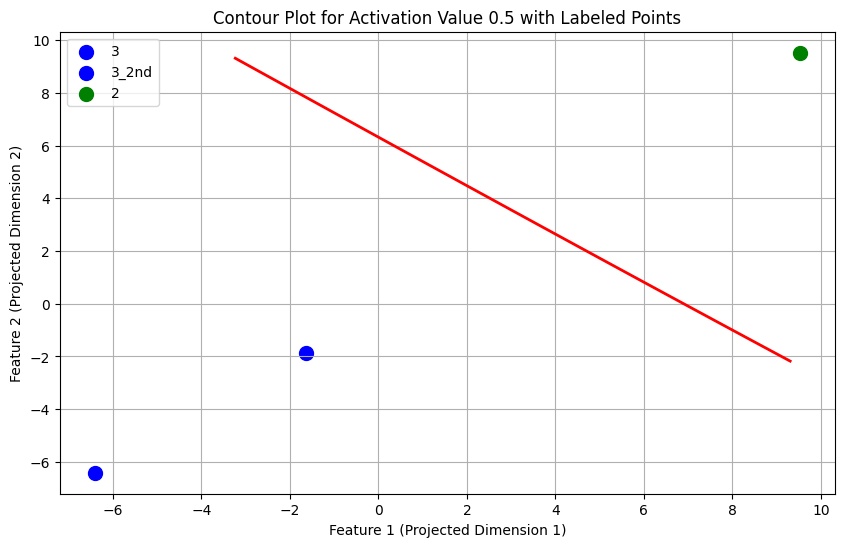

In [ ]:
# Step 1: Compute the projection matrix and translation vector
P, x0 = get_proj_mat(domain)  # P: (2, n), x0: (n,)

# Step 2: Project the domain to 2D
domain_2d = project_points(domain, P, x0)  # Shape: (m, 2)

# Step 3: Create a 2D grid in the projected space
x_min, x_max = domain_2d[:, 0].min(), domain_2d[:, 0].max()
y_min, y_max = domain_2d[:, 1].min(), domain_2d[:, 1].max()
x2 = np.linspace(x_min, x_max, 100)
y2 = np.linspace(y_min, y_max, 100)
X2, Y2 = np.meshgrid(x2, y2)  # Shapes: (100, 100)



# Define the labeled points
labeled_points = {
    "3": np.array(stacked_three_samples[0].detach().numpy()),
    "3_2nd": np.array(stacked_three_samples[2].detach().numpy()),
    "2": np.array(stacked_three_samples[1].detach().numpy()),
}

# Project the labeled points to 2D
projected_labeled_points = {label: project_points(point[None, :], P, x0)[0] for label, point in labeled_points.items()}

# Plot the contour for activation value 0.5
plt.figure(figsize=(10, 6))
contour = plt.contour(X2, Y2, Z, levels=[0.5], colors='red', linewidths=2)

# Plot the labeled points
for label, point in projected_labeled_points.items():
    if label in ["3" ,"3_2nd"]:
        plt.scatter(point[0], point[1], color='blue', label=label, s=100)  # Blue for inside
    elif label == "2":
        plt.scatter(point[0], point[1], color='green', label=label, s=100)  # Green for outside

# Add labels, title, and legend
plt.xlabel('Feature 1 (Projected Dimension 1)')
plt.ylabel('Feature 2 (Projected Dimension 2)')
plt.title('Contour Plot for Activation Value 0.5 with Labeled Points')
plt.legend()
plt.grid()
plt.show()


In [ ]:
# prompt: SAVE MODEL

torch.save(model.state_dict(), '/content/MNIST_non_downsample_model.pth')

In [ ]:
# prompt: load model

# Load the saved model state dictionary
model.load_state_dict(torch.load('/content/MNIST_non_downsample_model.pth'))

# Set the model to evaluation mode
model.eval()

<ipython-input-13-0bf2535cdfc2>:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('/content/MNIST_non_downsample_model.pth'))


MNISTClassifier(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (silu): SiLU()
  (fc2): Linear(in_features=128, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)